# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
from sklearn.utils import shuffle
# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import pandas as pd
classLabelList = pd.read_csv('signnames.csv')
classLabelList.keys()


Index(['ClassId', 'SignName'], dtype='object')

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Count the instance number for difference classes.
unique_class, unique_count = np.unique(y_train, return_counts=True)
train_sortedLabels = np.argsort(unique_count)

unique_class_test, unique_count_test = np.unique(y_test, return_counts=True)
test_sortedLabels = np.argsort(unique_count_test)
print(unique_count)
print(train_sortedLabels[unique_class])

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]
[ 0 37 19 32 27 41 42 24 29 39 21 40 20 36 22  6 16 34 30 23 28 26 15 33
 14 31 17 18 35 11  3  8  7  9 25  5  4 10 38 12 13  1  2]


In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


Top Three Maximum count Samples:


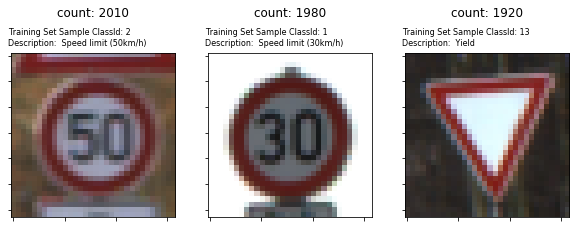

Bottom three least example images:


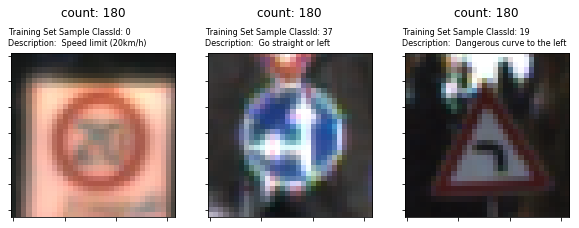

In [6]:
# draw the max size picture for training and testing
print("Top Three Maximum count Samples:")
fg, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))

class_id = train_sortedLabels[-1]
img_idx = np.where(y_train==class_id)
train_index = np.random.choice(img_idx[0])
ax1.imshow(X_train[train_index])
ax1.set_title('count: %d\n\n'%(unique_count[class_id]))
train_description = classLabelList[classLabelList.ClassId==class_id].SignName.to_string(header=False,index=False)
ax1.text(-1.0,-2.0,'Training Set Sample ClassId: %d\nDescription:  %s'%(class_id, train_description), fontsize=8)

class_id = train_sortedLabels[-2]
img_idx = np.where(y_train==class_id)
train_index = np.random.choice(img_idx[0])
ax2.imshow(X_train[train_index])
ax2.set_title('count: %d\n\n'%(unique_count[class_id]))
train_description = classLabelList[classLabelList.ClassId==y_train[train_index]].SignName.to_string(header=False,index=False)
ax2.text(-1.0,-2.0,'Training Set Sample ClassId: %d\nDescription:  %s'%(class_id, train_description), fontsize=8)

class_id = train_sortedLabels[-3]
img_idx = np.where(y_train==class_id)
train_index = np.random.choice(img_idx[0])
ax3.imshow(X_train[train_index])
ax3.set_title('count: %d\n\n'%(unique_count[class_id]))
train_description = classLabelList[classLabelList.ClassId==y_train[train_index]].SignName.to_string(header=False,index=False)
ax3.text(-1.0,-2.0,'Training Set Sample ClassId: %d\nDescription:  %s'%(class_id, train_description), fontsize=8)


plt.setp([a.get_xticklabels() for a in fg.axes], visible=False)
plt.setp([a.get_yticklabels() for a in fg.axes], visible=False)

plt.show()

### We also plot bottom three least example images:
print("Bottom three least example images:")
fg, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))

class_id = train_sortedLabels[0]
img_idx = np.where(y_train==class_id)
train_index = np.random.choice(img_idx[0])
ax1.imshow(X_train[train_index])
ax1.set_title('count: %d\n\n'%(unique_count[class_id]))
train_description = classLabelList[classLabelList.ClassId==class_id].SignName.to_string(header=False,index=False)
ax1.text(-1.0,-2.0,'Training Set Sample ClassId: %d\nDescription:  %s'%(class_id, train_description), fontsize=8)

class_id = train_sortedLabels[1]
img_idx = np.where(y_train==class_id)
train_index = np.random.choice(img_idx[0])
ax2.imshow(X_train[train_index])
ax2.set_title('count: %d\n\n'%(unique_count[class_id]))
train_description = classLabelList[classLabelList.ClassId==y_train[train_index]].SignName.to_string(header=False,index=False)
ax2.text(-1.0,-2.0,'Training Set Sample ClassId: %d\nDescription:  %s'%(class_id, train_description), fontsize=8)

class_id = train_sortedLabels[2]
img_idx = np.where(y_train==class_id)
train_index = np.random.choice(img_idx[0])
ax3.imshow(X_train[train_index])
ax3.set_title('count: %d\n\n'%(unique_count[class_id]))
train_description = classLabelList[classLabelList.ClassId==y_train[train_index]].SignName.to_string(header=False,index=False)
ax3.text(-1.0,-2.0,'Training Set Sample ClassId: %d\nDescription:  %s'%(class_id, train_description), fontsize=8)


plt.setp([a.get_xticklabels() for a in fg.axes], visible=False)
plt.setp([a.get_yticklabels() for a in fg.axes], visible=False)

plt.show()

In [7]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

def labelset_info(labelsettxt, dataset):
    # get stats for the labels
    labelset = dataset['labels']
    labelStats = pd.DataFrame(labelset)
   
#     print(labelsettxt, "set label stats:")
#     print(labelStats.describe())
   
    labelsInfo = {}
    modeCount = 0
    modeLabel = 0
    for i in range(len(labelset)):
        # for each label
        label = str(labelset[i])
      
        # try to see if there is a hash hit
        labelInstance = labelsInfo.get(label, {'count': 0, 'samples':[]})
      
        # add to the count
        count = labelInstance['count'] + 1
      
        # add to samples
        samples = labelInstance['samples']
        samples.append(i)
    
      # put in the last Index
        labelsInfo[label] = {'lastIdx':i, 'count': count, 'label':int(label), 'samples':samples}
      
        # update most common size
        if count > modeCount:
            modeCount = count 
            modeSize = labelsInfo[label]
    
    # get the list of counts and sort them
    sortedLabels = list(labelsInfo.keys())
   
    def compare_count(label):
        return labelsInfo[label]['count']
   
    sortedLabels.sort(key=compare_count)

    # get the unique number of original picture sizes and the min and max last instance
    n_labels = len(sortedLabels)
    minLabel = sortedLabels[0]
    maxLabel = sortedLabels[n_labels-1]

    # print the stats
    print("\nNumber of unique labels in", labelsettxt,"set: ", n_labels)

    print("\nDistribution of", labelsettxt, "set labels:")
    for n in range(n_labels):
        i = sortedLabels[n_labels-n-1]
        classId = labelsInfo[str(i)]['label']
        index = labelsInfo[str(i)]['lastIdx']
        count = labelsInfo[str(i)]['count']
        description = classLabelList[classLabelList.ClassId==classId].SignName.to_string(header=False,index=False)
        print(labelsettxt, " set count: {0:4d}  ClassId: {1:02d}  Description: {2}".format(count, classId, description))

    return n_labels, sortedLabels, labelsInfo, minLabel, maxLabel, modeLabel

train_labels, train_sortedLabels, train_labelInfo, train_minLabel, train_maxLabel, train_modeLabel = labelset_info("training", train)
test_labels, test_sortedLabels, test_labelInfo, test_minLabel, test_maxLabel, test_modeLabel = labelset_info("testing", test)



Number of unique labels in training set:  43

Distribution of training set labels:
training  set count: 2010  ClassId: 02  Description: Speed limit (50km/h)
training  set count: 1980  ClassId: 01  Description: Speed limit (30km/h)
training  set count: 1920  ClassId: 13  Description: Yield
training  set count: 1890  ClassId: 12  Description: Priority road
training  set count: 1860  ClassId: 38  Description: Keep right
training  set count: 1800  ClassId: 10  Description: No passing for vehicles over 3.5 metric tons
training  set count: 1770  ClassId: 04  Description: Speed limit (70km/h)
training  set count: 1650  ClassId: 05  Description: Speed limit (80km/h)
training  set count: 1350  ClassId: 25  Description: Road work
training  set count: 1320  ClassId: 09  Description: No passing
training  set count: 1290  ClassId: 07  Description: Speed limit (100km/h)
training  set count: 1260  ClassId: 08  Description: Speed limit (120km/h)
training  set count: 1260  ClassId: 03  Description: Sp

Train set sample images (RGB): 100%|██████████| 43/43 [00:12<00:00,  3.48labels/s]


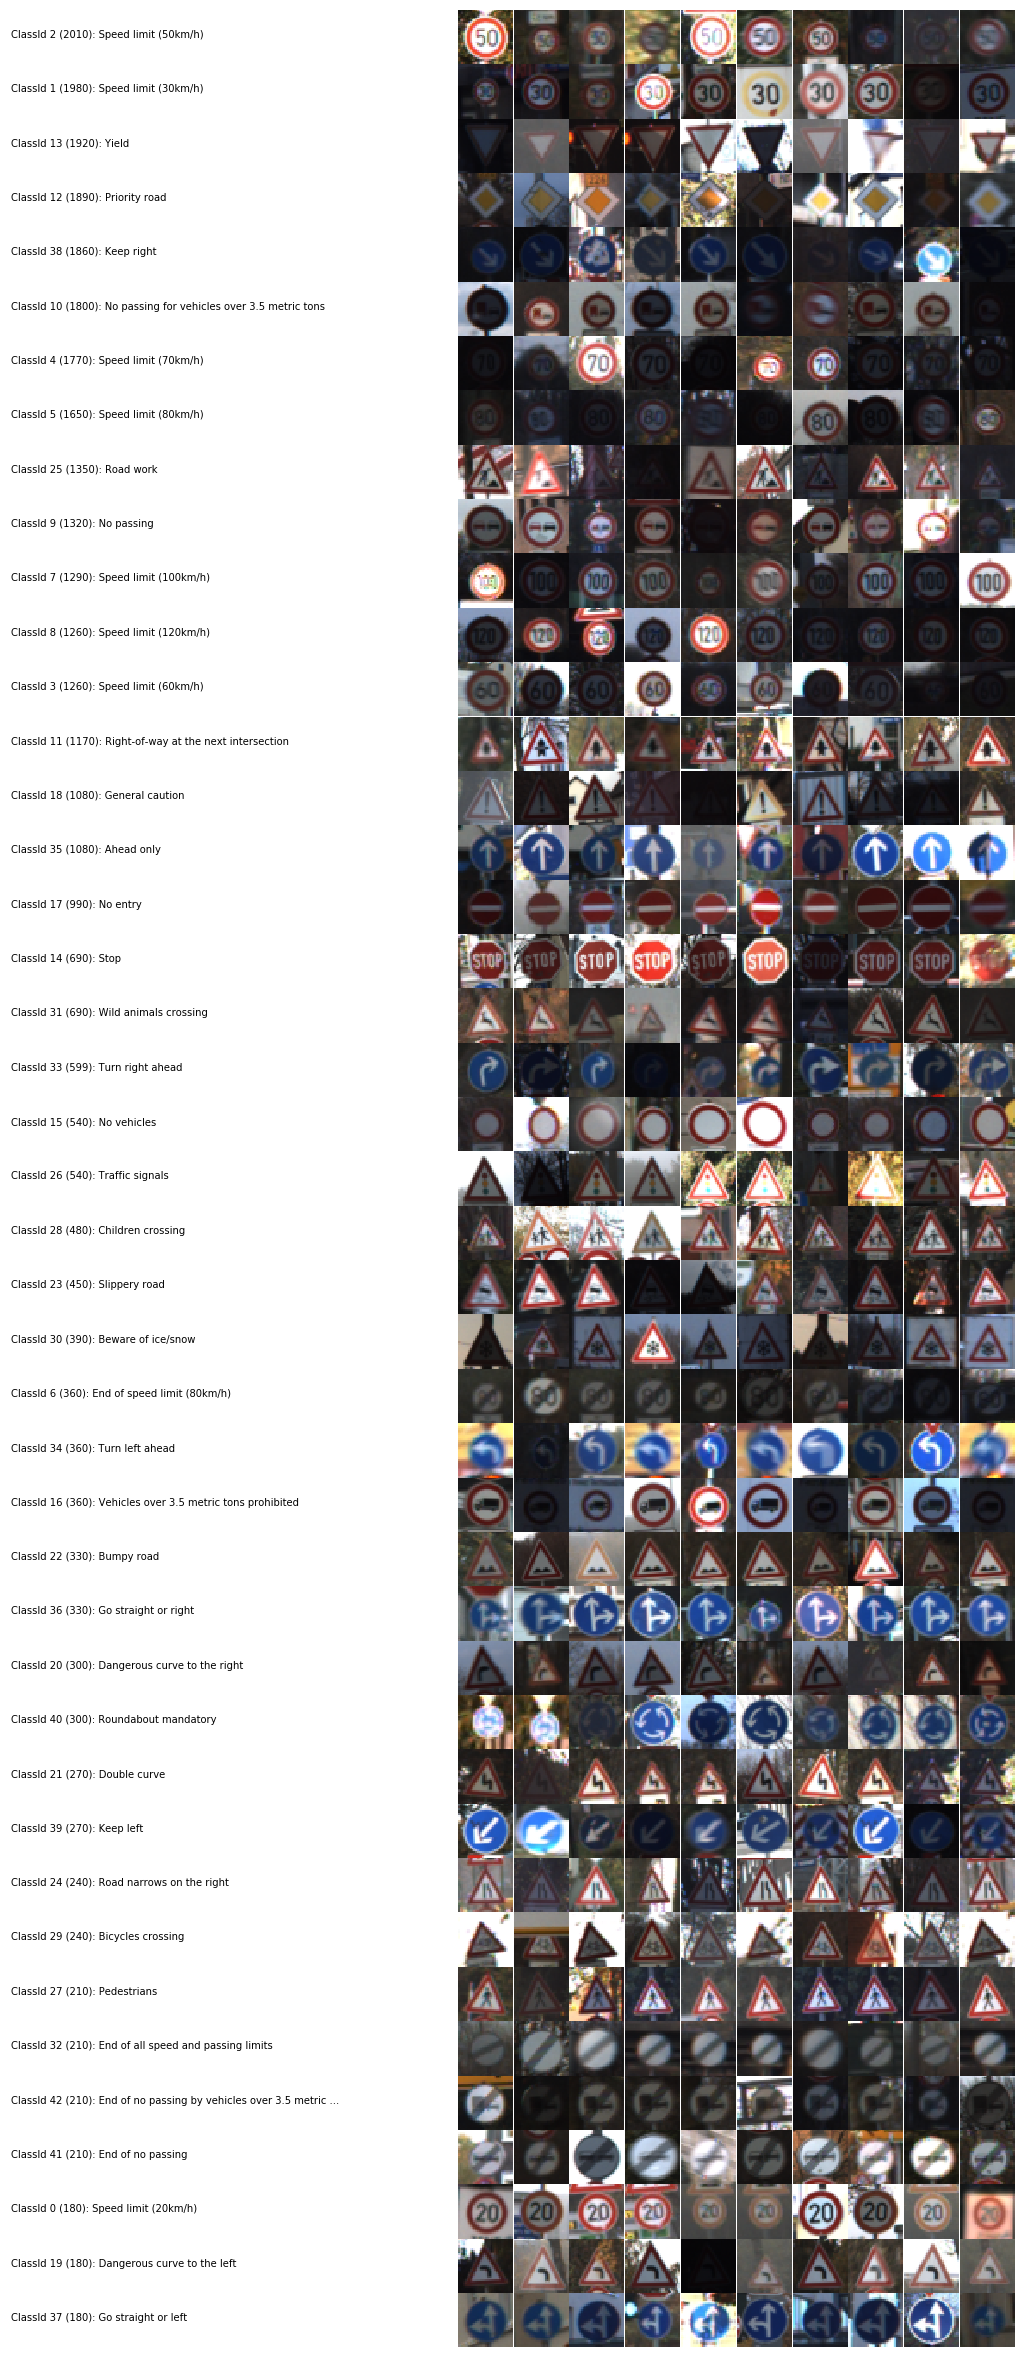

Test set sample images (RGB): 100%|██████████| 43/43 [00:13<00:00,  3.31labels/s]


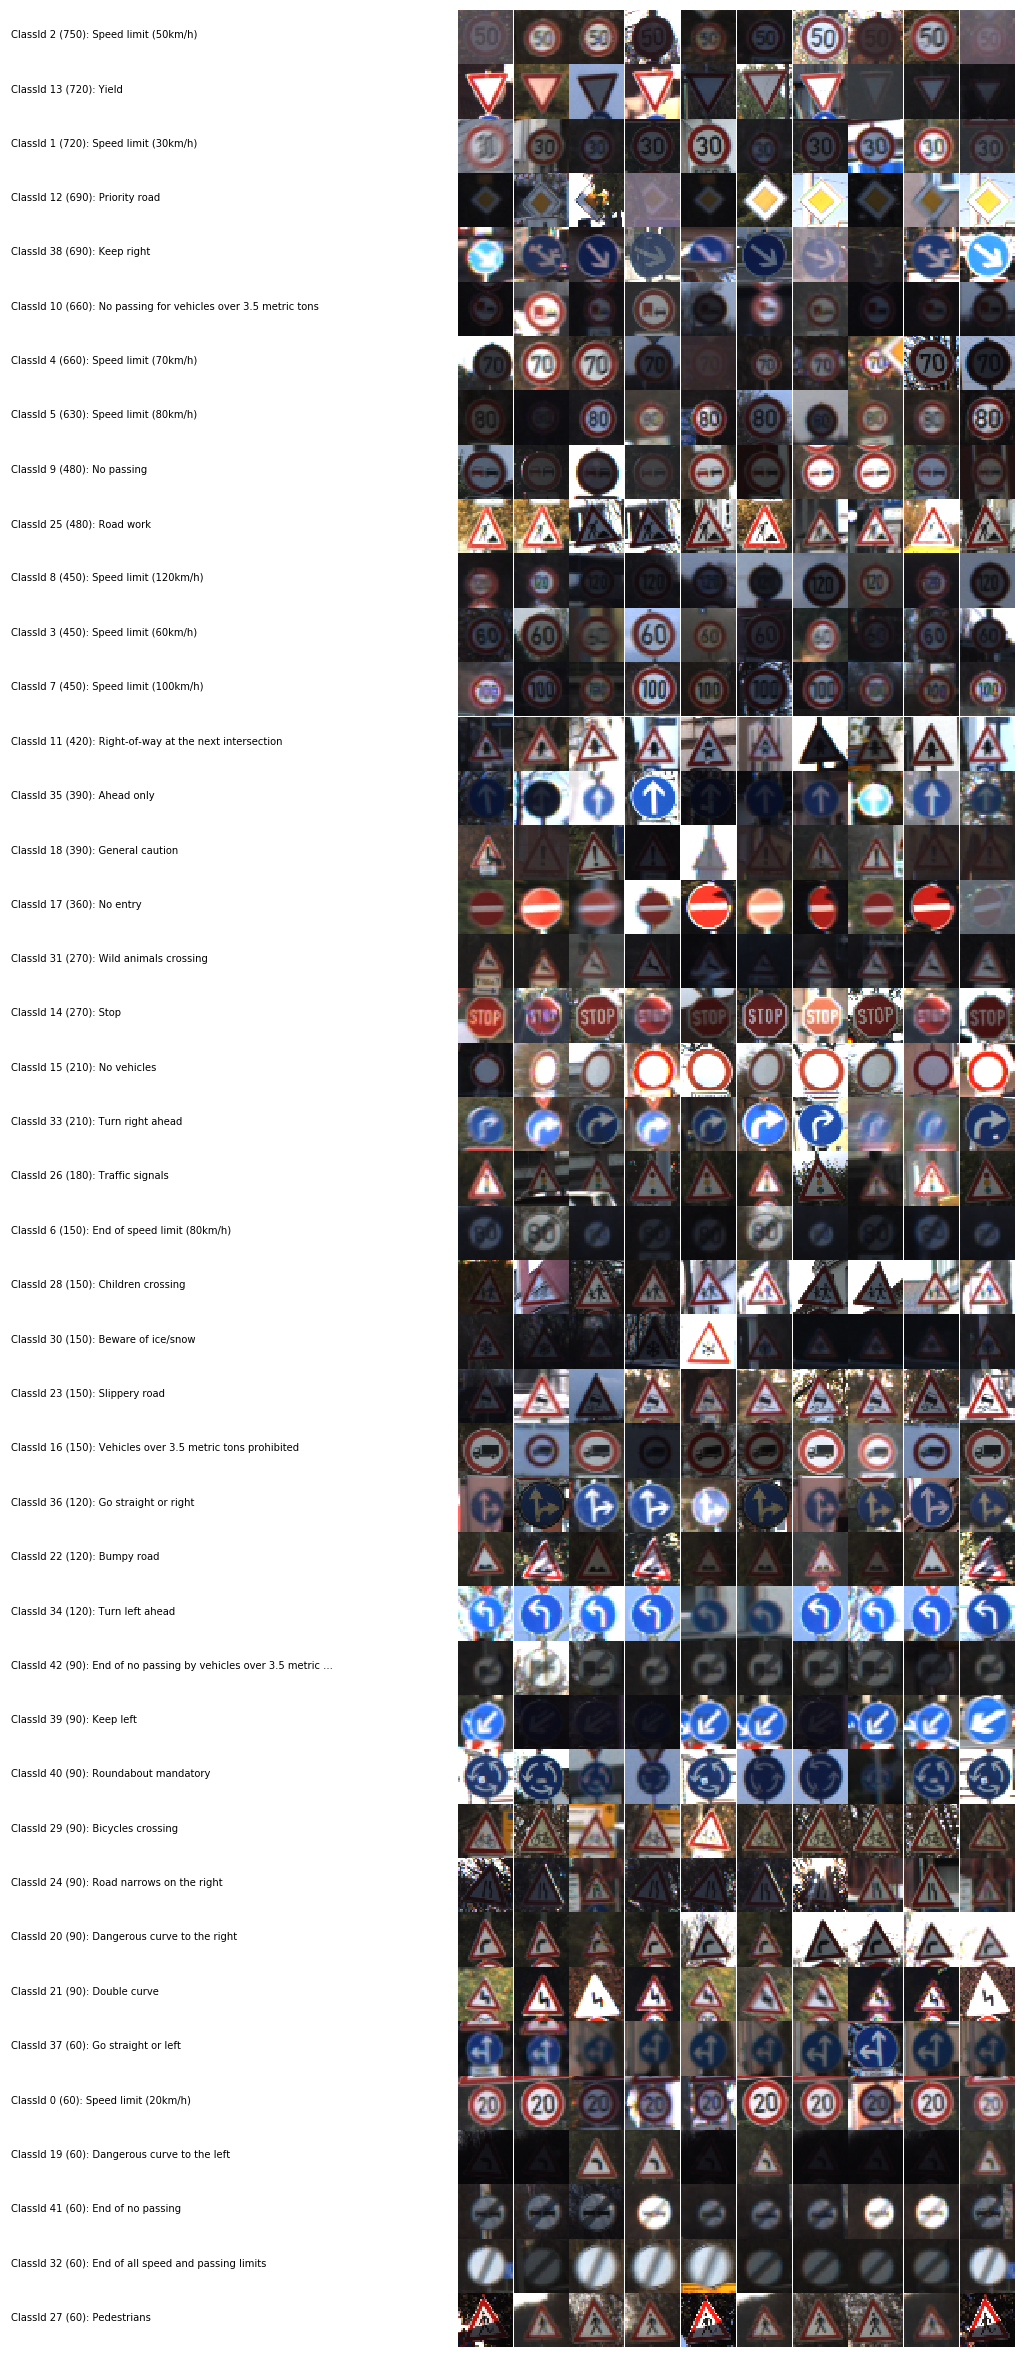

In [8]:
from tqdm import tqdm
import time
from matplotlib import gridspec

def draw_sample_labelsets(datasettxt, sortedlabels, labeldata, dataset, n_samples=10, cmap=None):
    
    n_labels = len(sortedlabels)
    
    # size of each sample
    fig = plt.figure(figsize=(n_samples*1.8, n_labels))
    w_ratios = [1 for n in range(n_samples)]
    w_ratios[:0] = [int(n_samples*0.8)]
    h_ratios = [1 for n in range(n_labels)]

    # gridspec
    time.sleep(1) # wait for 1 second for the previous print to appear!
    grid = gridspec.GridSpec(n_labels, n_samples+1, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
    labelset_pbar = tqdm(range(n_labels), desc=datasettxt, unit='labels')
    for a in labelset_pbar:
        classId = labeldata[str(sortedlabels[n_labels-a-1])]['label']
        description = classLabelList[classLabelList.ClassId==classId].SignName.to_string(header=False,index=False)
        count = labeldata[str(sortedlabels[n_labels-a-1])]['count']
        for b in range(n_samples+1):
            i = a*(n_samples+1) + b
            ax = plt.Subplot(fig, grid[i])
            if b == 0:
                ax.annotate('ClassId %d (%d): %s'%(classId, count, description), xy=(0,0), xytext=(0.0,0.5))
                ax.set_xticks([])
                ax.set_yticks([])
                fig.add_subplot(ax)
            else:
                random_i = np.random.choice(labeldata[str(sortedlabels[n_labels-a-1])]['samples'])
                image = dataset[random_i]
                if cmap == None:
                    ax.imshow(image)
                else:
                    # yuv = cv2.split(image)
                    # ax.imshow(yuv[0], cmap=cmap)
                    ax.imshow(image, cmap=cmap)
                ax.set_xticks([])
                ax.set_yticks([])
                fig.add_subplot(ax)
    
        # hide the borders\
        if a == (n_labels-1):
            all_axes = fig.get_axes()
            for ax in all_axes:
                for sp in ax.spines.values():
                    sp.set_visible(False)

    plt.show()

draw_sample_labelsets('Train set sample images (RGB)', train_sortedLabels, train_labelInfo, X_train)
draw_sample_labelsets('Test set sample images (RGB)', test_sortedLabels, test_labelInfo, X_test)

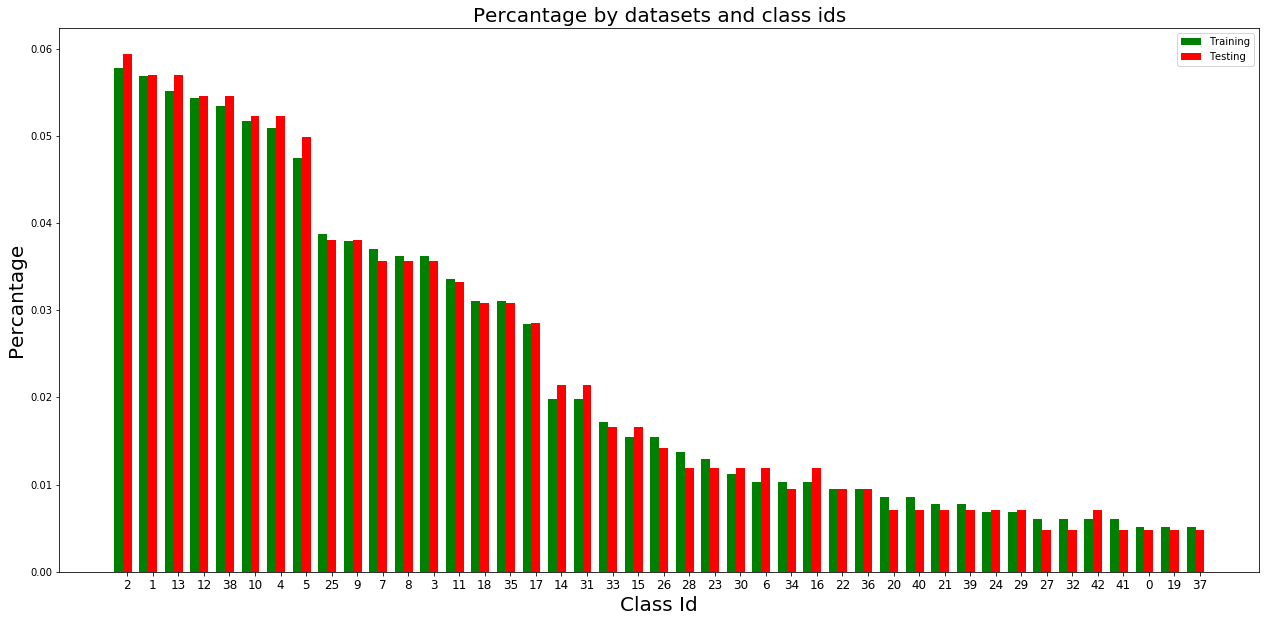

In [9]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
def my_reverse(list):
    newlist = []
    for n in list:
        newlist[:0] = [n]
    return newlist

# Plot bar graph of class id count distribution
n_labels = len(train_sortedLabels)
training_labels = my_reverse(train_sortedLabels)
training_counts = [train_labelInfo[n]['count'] for n in training_labels]
training_percantage = training_counts / np.sum(training_counts)
testing_counts = [test_labelInfo[n]['count'] for n in training_labels]
test_percantage = testing_counts / np.sum(testing_counts)

ind = np.arange(n_labels)
width = 0.35

fg, ax = plt.subplots(figsize=(n_labels/2, 10))
rects1 = ax.bar(ind+1, training_percantage, width, color='g')
rects2 = ax.bar(ind+1+width, test_percantage, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel("Percantage", fontsize=20)
ax.set_title("Percantage by datasets and class ids", fontsize=20)
ax.set_xticks(ind + width+1.0)
ax.set_xticklabels(training_labels, fontsize=12)
ax.set_xlabel("Class Id", fontsize=20)

ax.legend((rects1[0], rects2[0]), ('Training', 'Testing'))
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train = (X_train - 128) / 128
X_valid = (X_valid - 128) / 128
X_test = (X_test - 128) / 128


from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Here we use LeNet 5 archecture

import tensorflow as tf
from models import LeNet


/home/stevenwudi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [12]:
rate = 0.001

logits = LeNet(x, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [16]:
EPOCHS = 100
BATCH_SIZE = 128


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.443
Validation Accuracy = 0.315

EPOCH 2 ...
Training Accuracy = 0.701
Validation Accuracy = 0.548

EPOCH 3 ...
Training Accuracy = 0.788
Validation Accuracy = 0.627

EPOCH 4 ...
Training Accuracy = 0.843
Validation Accuracy = 0.670

EPOCH 5 ...
Training Accuracy = 0.877
Validation Accuracy = 0.686

EPOCH 6 ...
Training Accuracy = 0.900
Validation Accuracy = 0.715

EPOCH 7 ...
Training Accuracy = 0.910
Validation Accuracy = 0.716

EPOCH 8 ...
Training Accuracy = 0.939
Validation Accuracy = 0.741

EPOCH 9 ...
Training Accuracy = 0.953
Validation Accuracy = 0.751

EPOCH 10 ...
Training Accuracy = 0.955
Validation Accuracy = 0.739

EPOCH 11 ...
Training Accuracy = 0.958
Validation Accuracy = 0.733

EPOCH 12 ...
Training Accuracy = 0.972
Validation Accuracy = 0.752

EPOCH 13 ...
Training Accuracy = 0.976
Validation Accuracy = 0.754

EPOCH 14 ...
Training Accuracy = 0.972
Validation Accuracy = 0.741

EPOCH 15 ...
Training Accuracy = 0.977
Valid

#### Second attemp with better preprocessing

In [ ]:
### Preprocess the data here.
###
### Step 1:
### According to the given paper, http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
### We convert the data into YUV space using Y

import cv2

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


def RGB2YUV(image_data):
    yuv_image_data = []
    for i in range(len(image_data)):
        yuv_image_data.append(cv2.cvtColor(image_data[i], cv2.COLOR_RGB2YUV))
    return np.array(yuv_image_data)



X_train = RGB2YUV(X_train)
X_valid = RGB2YUV(X_valid)
X_test = RGB2YUV(X_test)
print('Features are now converted YUV!')
X_train.shape

In [45]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


def RGB2YUV(image_data):
    yuv_image_data = []
    for i in range(len(image_data)):
        yuv_image_data.append(cv2.cvtColor(image_data[i], cv2.COLOR_RGB2YUV)[:,:, 0])
    return np.expand_dims(np.array(yuv_image_data), axis=3)

X_train = RGB2YUV(X_train)
X_valid = RGB2YUV(X_valid)
X_test = RGB2YUV(X_test)
print('Features are now converted YUV!')
X_train.shape


Features are now converted YUV!


(39209,)

In [40]:
f_mean = np.mean(X_train)
print(f_mean)
f_std = np.std(X_train)
print(f_std)

X_train = (X_train - f_mean) / f_std
X_valid = (X_valid - f_mean) / f_std
X_test = (X_test - f_mean) / f_std

81.91723852405062
66.13439739365434


In [41]:
X_train, y_train = shuffle(X_train, y_train)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
rate = 0.001

logits = LeNet(x, input_channel=1, n_classes=n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
# **Traffic Sign Recognition** 



def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


EPOCHS = 100
BATCH_SIZE = 128


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
     
    test_accuracy = evaluate(X_test, y_test)    
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.841
Validation Accuracy = 0.768

EPOCH 2 ...
Training Accuracy = 0.923
Validation Accuracy = 0.859

EPOCH 3 ...
Training Accuracy = 0.953
Validation Accuracy = 0.871

EPOCH 4 ...
Training Accuracy = 0.971
Validation Accuracy = 0.904

EPOCH 5 ...
Training Accuracy = 0.980
Validation Accuracy = 0.893

EPOCH 6 ...
Training Accuracy = 0.984
Validation Accuracy = 0.906

EPOCH 7 ...
Training Accuracy = 0.987
Validation Accuracy = 0.915

EPOCH 8 ...
Training Accuracy = 0.988
Validation Accuracy = 0.908

EPOCH 9 ...
Training Accuracy = 0.987
Validation Accuracy = 0.909

EPOCH 10 ...
Training Accuracy = 0.990
Validation Accuracy = 0.905

EPOCH 11 ...
Training Accuracy = 0.995
Validation Accuracy = 0.920

EPOCH 12 ...
Training Accuracy = 0.993
Validation Accuracy = 0.910

EPOCH 13 ...
Training Accuracy = 0.985
Validation Accuracy = 0.894

EPOCH 14 ...
Training Accuracy = 0.996
Validation Accuracy = 0.910

EPOCH 15 ...
Training Accuracy = 0.996
Valid

YUV example images:


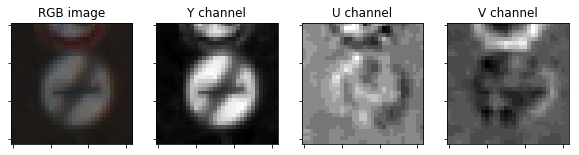

In [24]:
### We also plot bottom three least example images:
print("YUV example images:")
fg, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 10))

ax1.imshow(train['features'][0])
ax1.set_title('RGB image')

ax2.imshow(yuv_image_data[:, :, 0], cmap='gray')
ax2.set_title('Y channel')

ax3.imshow(yuv_image_data[:, :, 1], cmap='gray')
ax3.set_title('U channel')

ax4.imshow(yuv_image_data[:, :, 2], cmap='gray')
ax4.set_title('V channel')

plt.setp([a.get_xticklabels() for a in fg.axes], visible=False)
plt.setp([a.get_yticklabels() for a in fg.axes], visible=False)

plt.show()

In [1]:
# The followings are the DenseNets module, the training was actually taken place in the `run_dense_net.py` file.
# Sorry, I really like Pycharm (and to be fair, Pytorch is so much an easier language to debug)
import argparse
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
from models import DenseNet
from data_providers.utils import get_data_provider_by_name

train_params_cifar = {
    'batch_size': 128,
    'n_epochs': 100,
    'initial_learning_rate': 0.01,
    'reduce_lr_epoch_1': 50,  # epochs * 0.5
    'reduce_lr_epoch_2': 75,  # epochs * 0.75
    'validation_set': True,
    'validation_split': None,  # None or float
    'shuffle': 'every_epoch',  # None, once_prior_train, every_epoch
    'normalization': 'by_chanels',  # None, divide_256, divide_255, by_chanels
    'use_Y': False,  # use only Y channel
}


def get_train_params_by_name(name):
    if name in ['C10', 'C10+', 'C100', 'C100+', 'GTSR']:
        return train_params_cifar

/home/stevenwudi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
import json
# We save this model params.json from the trained model
with open('model_params.json', 'r') as fp:
    model_params = json.load(fp)

In [3]:
# some default params dataset/architecture related
train_params = get_train_params_by_name(model_params['dataset'])
print("Params:")
for k, v in model_params.items():
    print("\t%s: %s" % (k, v))
print("Train params:")
for k, v in train_params.items():
    print("\t%s: %s" % (k, v))

print("Prepare training data...")
data_provider = get_data_provider_by_name(model_params['dataset'], train_params)
print("Initialize the model..")
model = DenseNet(data_provider=data_provider, **model_params)

Params:
	train: True
	test: True
	model_type: DenseNet
	growth_rate: 12
	depth: 40
	dataset: GTSR
	total_blocks: 3
	keep_prob: 1.0
	weight_decay: 0.0001
	nesterov_momentum: 0.9
	reduction: 1.0
	should_save_logs: True
	should_save_model: True
	renew_logs: True
	bc_mode: False
Train params:
	batch_size: 128
	n_epochs: 100
	initial_learning_rate: 0.01
	reduce_lr_epoch_1: 50
	reduce_lr_epoch_2: 75
	validation_set: True
	validation_split: None
	shuffle: every_epoch
	normalization: by_chanels
	use_Y: False
Prepare training data...
Initialize the model..
Build DenseNet model with 3 blocks, 12 composite layers each.
Reduction at transition layers: 1.0
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Total training params: 1.1M


In [4]:
model.load_model()

INFO:tensorflow:Restoring parameters from saves/DenseNet_growth_rate=12_depth=40_dataset_GTSR/model.chkpt
INFO:tensorflow:Restoring parameters from saves/DenseNet_growth_rate=12_depth=40_dataset_GTSR/model.chkpt
Successfully load model from save path: saves/DenseNet_growth_rate=12_depth=40_dataset_GTSR/model.chkpt


In [7]:
loss, accuracy = model.test(data_provider.test, batch_size=200)
print("mean cross_entropy: %f, mean accuracy: %f" % (loss, accuracy))

mean cross_entropy: 5.378031, mean accuracy: 0.042955


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")